# Calculate Homography Transformation Matrix Error

In [1]:
from drivenetbench.view_transformer import ViewTransformer
from drivenetbench.utilities.utils import check_if_notebook
import numpy as np
import supervision as sv
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
ref_vertex_annoatator = sv.VertexAnnotator(color=sv.Color.BLUE, radius=10)
transformed_vertex_annotator = sv.VertexAnnotator(
    color=sv.Color.RED, radius=10
)

## Position 1

In [3]:
original_source_keypoints = np.load(
    "/Users/aalbustami/UMD/BIMI/projects/broverette/DriveNetBench/keypoints/old_keypoints_from_camera.npy"
)
target_keypoints = np.load(
    "/Users/aalbustami/UMD/BIMI/projects/broverette/DriveNetBench/keypoints/old_keypoints_from_digital.npy"
)
source_keypoints = original_source_keypoints[np.newaxis, ...]
target_keypoints = target_keypoints[np.newaxis, ...]

source_keypoints = sv.KeyPoints(source_keypoints)
target_keypoints = sv.KeyPoints(target_keypoints)

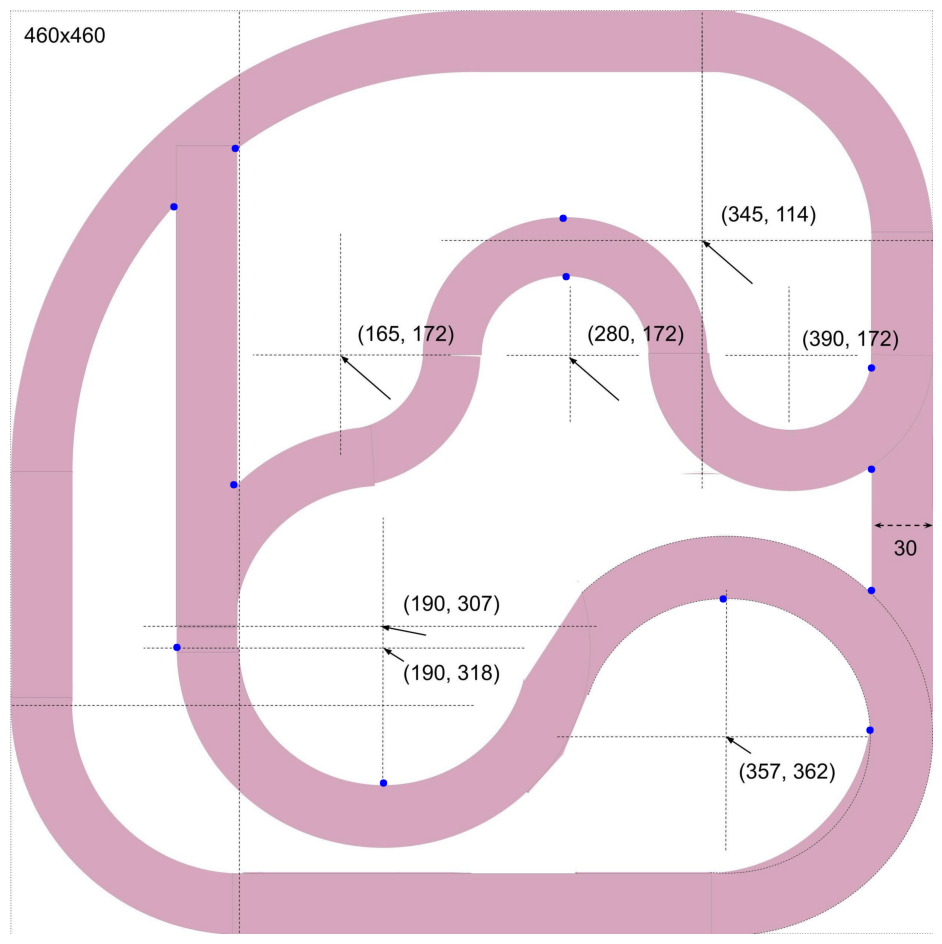

In [4]:
target_frame = Image.open(
    "/Users/aalbustami/UMD/BIMI/projects/broverette/DriveNetBench/assets/track.jpg"
)
target_frame = ref_vertex_annoatator.annotate(target_frame, target_keypoints)
sv.plot_image(target_frame)

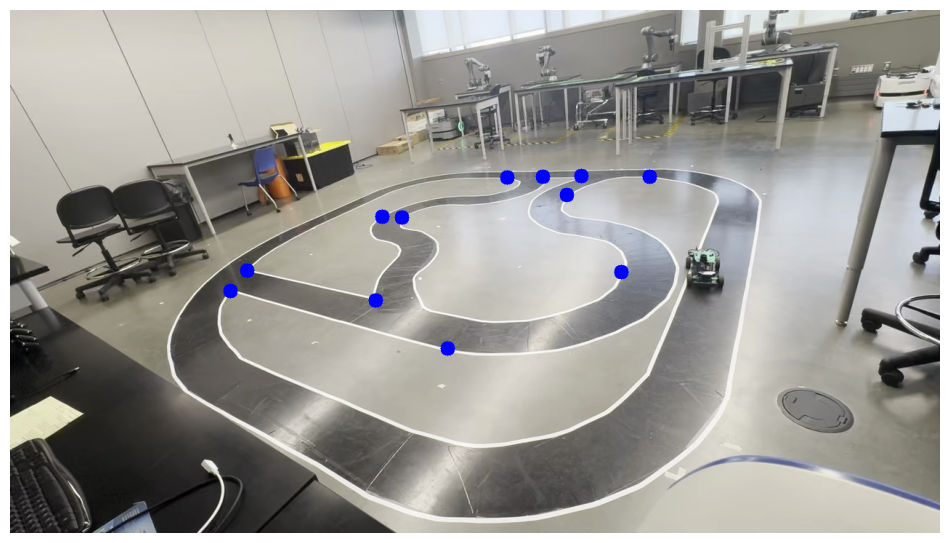

In [5]:
source_image = Image.open(
    "/Users/aalbustami/UMD/BIMI/projects/broverette/DriveNetBench/assets/frame_capture.png"
)
source_image = ref_vertex_annoatator.annotate(source_image, source_keypoints)
sv.plot_image(source_image)

In [6]:
view_transformer = ViewTransformer(
    source=source_keypoints, target=target_keypoints
)

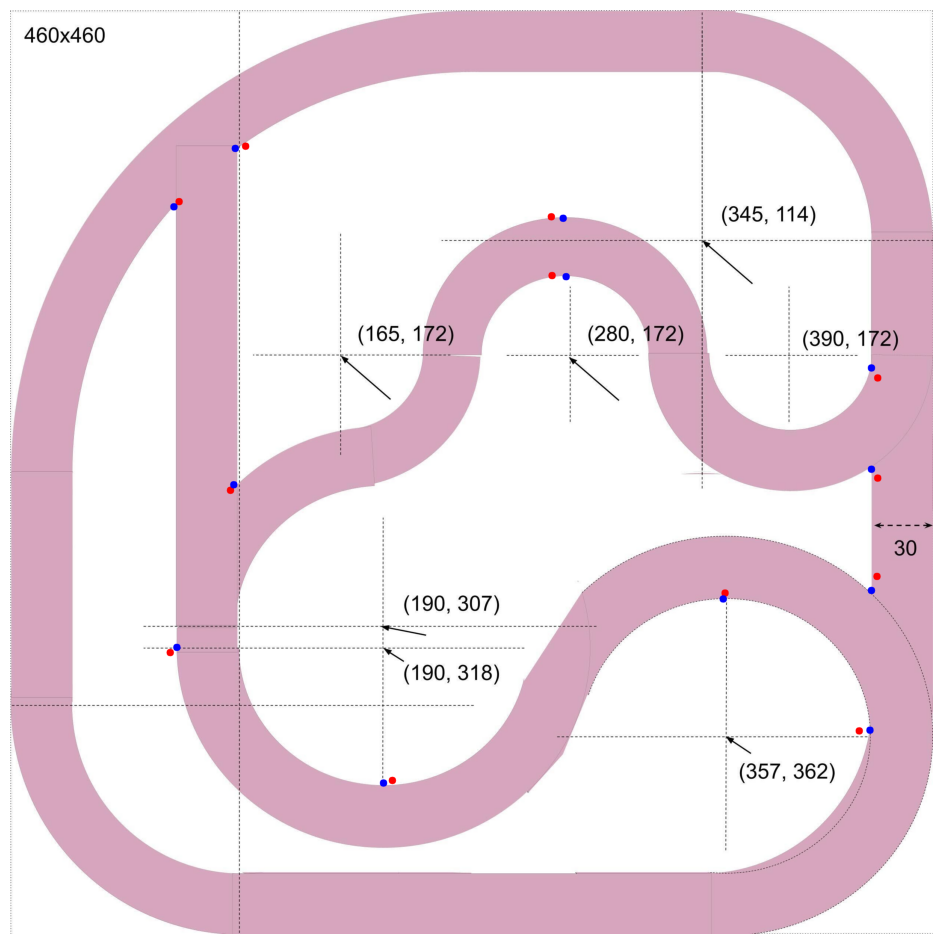

In [7]:
image = Image.open(
    "/Users/aalbustami/UMD/BIMI/projects/broverette/DriveNetBench/assets/track.jpg"
)
annotated_image = image.copy()
# annotated_image = ref_vertex_annoatator.annotate(annotated_image, source_keypoints)
transformed_keypoints = view_transformer.transform_points(
    original_source_keypoints
)
transformed_keypoints = transformed_keypoints[np.newaxis, ...]
transformed_keypoints = sv.KeyPoints(transformed_keypoints)
annotated_image = transformed_vertex_annotator.annotate(
    annotated_image, transformed_keypoints
)
annotated_image = ref_vertex_annoatator.annotate(
    annotated_image, target_keypoints
)
sv.plot_image(annotated_image)

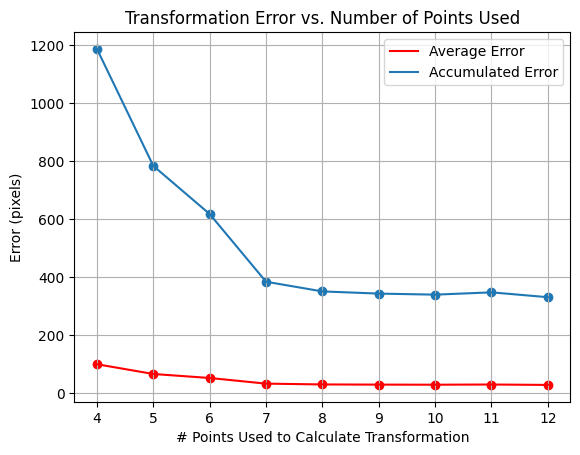

In [8]:
org_source_keypoints = np.load(
    "/Users/aalbustami/UMD/BIMI/projects/broverette/DriveNetBench/keypoints/old_keypoints_from_camera.npy"
)
org_target_keypoints = np.load(
    "/Users/aalbustami/UMD/BIMI/projects/broverette/DriveNetBench/keypoints/old_keypoints_from_digital.npy"
)

avg_errors = []
accumulated_errors = []

TOTAL_POINTS = 12
for i in range(4, TOTAL_POINTS + 1):
    source_keypoints = org_source_keypoints[:i, ...]
    target_keypoints = org_target_keypoints[:i, ...]

    source_keypoints = source_keypoints[np.newaxis, ...]
    target_keypoints = target_keypoints[np.newaxis, ...]

    source_keypoints = sv.KeyPoints(source_keypoints)
    target_keypoints = sv.KeyPoints(target_keypoints)

    view_transformer = ViewTransformer(
        source=source_keypoints, target=target_keypoints
    )

    transformed_keypoints = view_transformer.transform_points(
        original_source_keypoints
    )
    transformed_keypoints = transformed_keypoints[np.newaxis, ...]
    transformed_keypoints = sv.KeyPoints(transformed_keypoints)

    avg_error, accumulated_error = (
        view_transformer.calculate_transformation_error(
            source=org_source_keypoints,
            target=org_target_keypoints,
        )
    )
    avg_errors.append(avg_error)
    accumulated_errors.append(accumulated_error)


plt.plot(
    range(4, TOTAL_POINTS + 1), avg_errors, label="Average Error", color="r"
)
plt.scatter(range(4, TOTAL_POINTS + 1), avg_errors, color="r")
plt.plot(
    range(4, TOTAL_POINTS + 1), accumulated_errors, label="Accumulated Error"
)
plt.scatter(range(4, TOTAL_POINTS + 1), accumulated_errors)
plt.legend()
plt.xlabel("# Points Used to Calculate Transformation")
plt.ylabel("Error (pixels)")
plt.title("Transformation Error vs. Number of Points Used")
plt.grid()
plt.show()

## Position 2

In [9]:
original_source_keypoints = np.load(
    "/Users/aalbustami/UMD/BIMI/projects/broverette/DriveNetBench/keypoints/pos2_keypoints_from_camera.npy"
)
target_keypoints = np.load(
    "/Users/aalbustami/UMD/BIMI/projects/broverette/DriveNetBench/keypoints/old_keypoints_from_digital.npy"
)
source_keypoints = original_source_keypoints[np.newaxis, ...]
target_keypoints = target_keypoints[np.newaxis, ...]

source_keypoints = sv.KeyPoints(source_keypoints)
target_keypoints = sv.KeyPoints(target_keypoints)

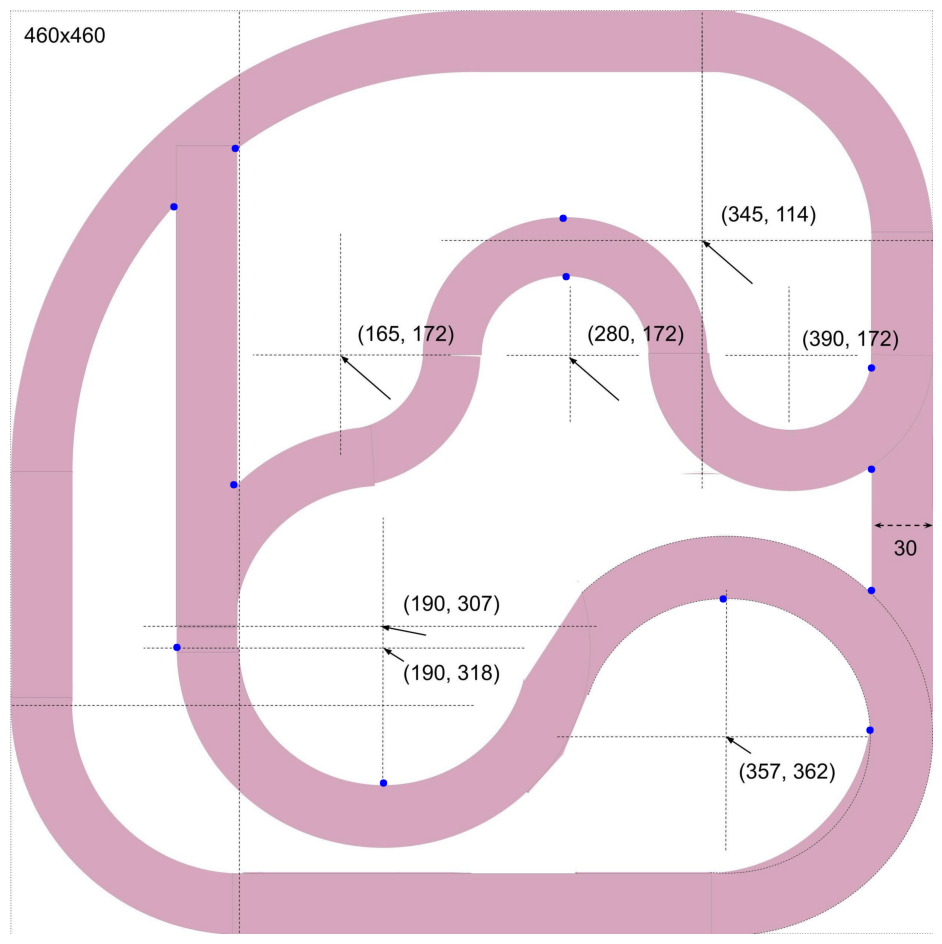

In [10]:
target_frame = Image.open(
    "/Users/aalbustami/UMD/BIMI/projects/broverette/DriveNetBench/assets/track.jpg"
)
target_frame = ref_vertex_annoatator.annotate(target_frame, target_keypoints)
sv.plot_image(target_frame)

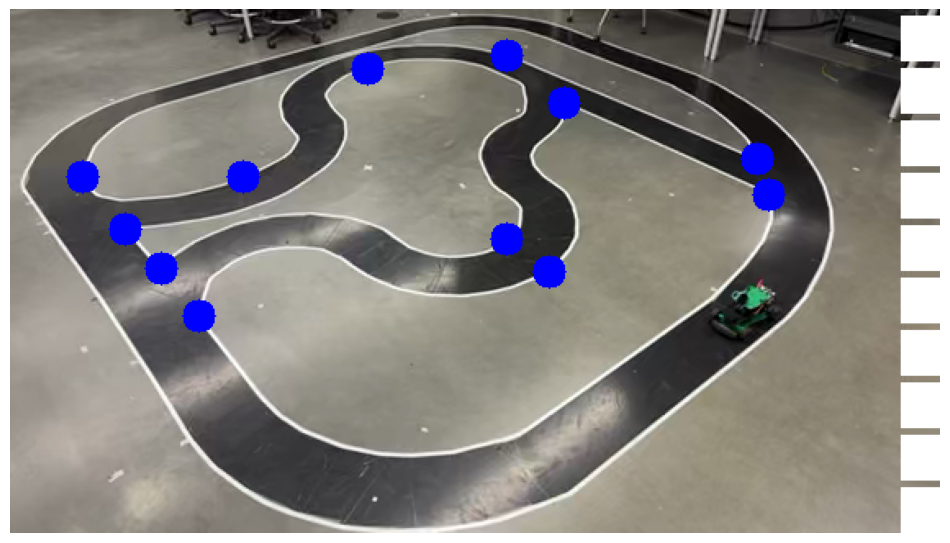

In [11]:
source_image = Image.open(
    "/Users/aalbustami/UMD/BIMI/projects/broverette/DriveNetBench/assets/pos2_frame_capture.png"
)
source_image = ref_vertex_annoatator.annotate(source_image, source_keypoints)
sv.plot_image(source_image)

In [12]:
view_transformer = ViewTransformer(
    source=source_keypoints, target=target_keypoints
)

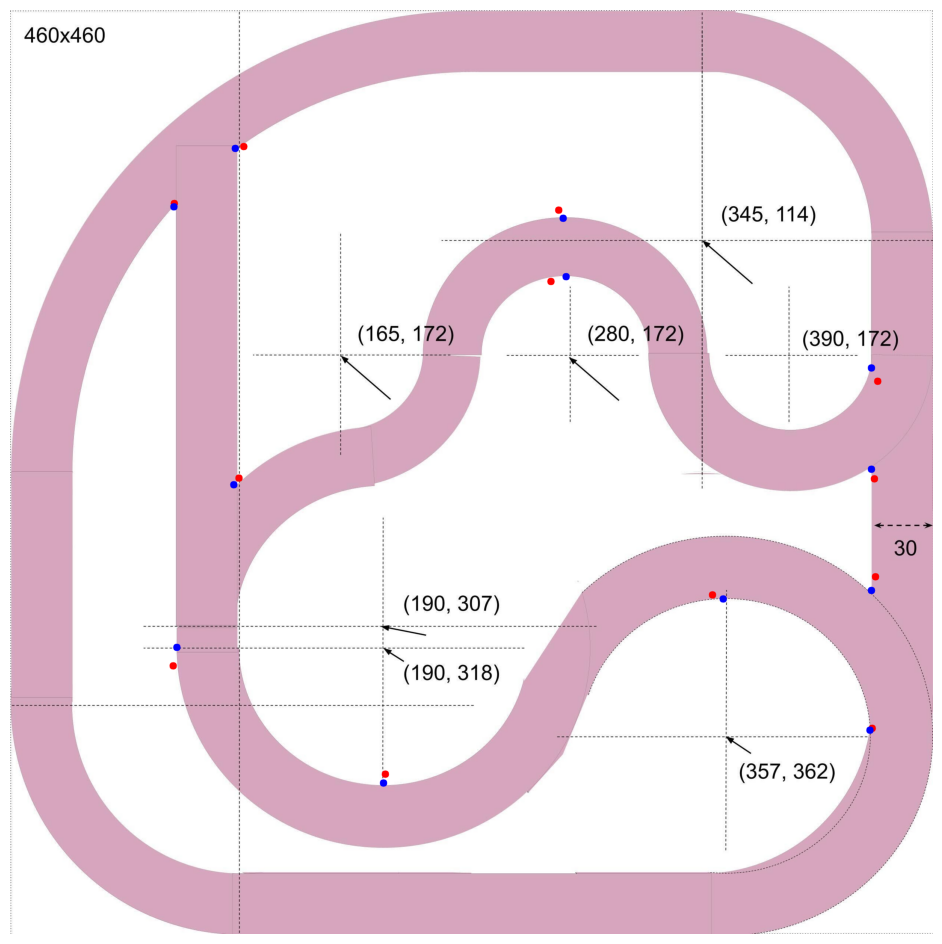

In [13]:
image = Image.open(
    "/Users/aalbustami/UMD/BIMI/projects/broverette/DriveNetBench/assets/track.jpg"
)
annotated_image = image.copy()
# annotated_image = ref_vertex_annoatator.annotate(annotated_image, source_keypoints)
transformed_keypoints = view_transformer.transform_points(
    original_source_keypoints
)
transformed_keypoints = transformed_keypoints[np.newaxis, ...]
transformed_keypoints = sv.KeyPoints(transformed_keypoints)
annotated_image = transformed_vertex_annotator.annotate(
    annotated_image, transformed_keypoints
)
annotated_image = ref_vertex_annoatator.annotate(
    annotated_image, target_keypoints
)
sv.plot_image(annotated_image)

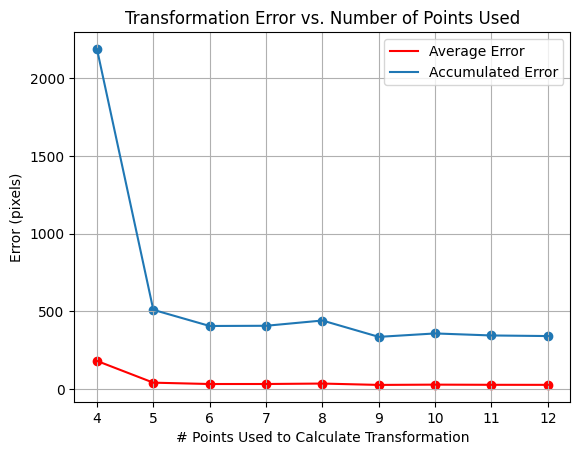

In [15]:
org_source_keypoints = np.load(
    "/Users/aalbustami/UMD/BIMI/projects/broverette/DriveNetBench/keypoints/pos2_keypoints_from_camera.npy"
)
org_target_keypoints = np.load(
    "/Users/aalbustami/UMD/BIMI/projects/broverette/DriveNetBench/keypoints/old_keypoints_from_digital.npy"
)

avg_errors = []
accumulated_errors = []

TOTAL_POINTS = 12
for i in range(4, TOTAL_POINTS + 1):
    source_keypoints = org_source_keypoints[:i, ...]
    target_keypoints = org_target_keypoints[:i, ...]

    source_keypoints = source_keypoints[np.newaxis, ...]
    target_keypoints = target_keypoints[np.newaxis, ...]

    source_keypoints = sv.KeyPoints(source_keypoints)
    target_keypoints = sv.KeyPoints(target_keypoints)

    view_transformer = ViewTransformer(
        source=source_keypoints, target=target_keypoints
    )

    transformed_keypoints = view_transformer.transform_points(
        original_source_keypoints
    )
    transformed_keypoints = transformed_keypoints[np.newaxis, ...]
    transformed_keypoints = sv.KeyPoints(transformed_keypoints)

    avg_error, accumulated_error = (
        view_transformer.calculate_transformation_error(
            source=org_source_keypoints,
            target=org_target_keypoints,
        )
    )
    avg_errors.append(avg_error)
    accumulated_errors.append(accumulated_error)


plt.plot(
    range(4, TOTAL_POINTS + 1), avg_errors, label="Average Error", color="r"
)
plt.scatter(range(4, TOTAL_POINTS + 1), avg_errors, color="r")
plt.plot(
    range(4, TOTAL_POINTS + 1), accumulated_errors, label="Accumulated Error"
)
plt.scatter(range(4, TOTAL_POINTS + 1), accumulated_errors)
plt.legend()
plt.xlabel("# Points Used to Calculate Transformation")
plt.ylabel("Error (pixels)")
plt.title("Transformation Error vs. Number of Points Used")
plt.grid()
plt.show()

## Position 3

In [19]:
original_source_keypoints = np.load(
    "/Users/aalbustami/UMD/BIMI/projects/broverette/DriveNetBench/keypoints/pos3_keypoints_from_camera.npy"
)
target_keypoints = np.load(
    "/Users/aalbustami/UMD/BIMI/projects/broverette/DriveNetBench/keypoints/old_keypoints_from_digital.npy"
)
source_keypoints = original_source_keypoints[np.newaxis, ...]
target_keypoints = target_keypoints[np.newaxis, ...]

source_keypoints = sv.KeyPoints(source_keypoints)
target_keypoints = sv.KeyPoints(target_keypoints)

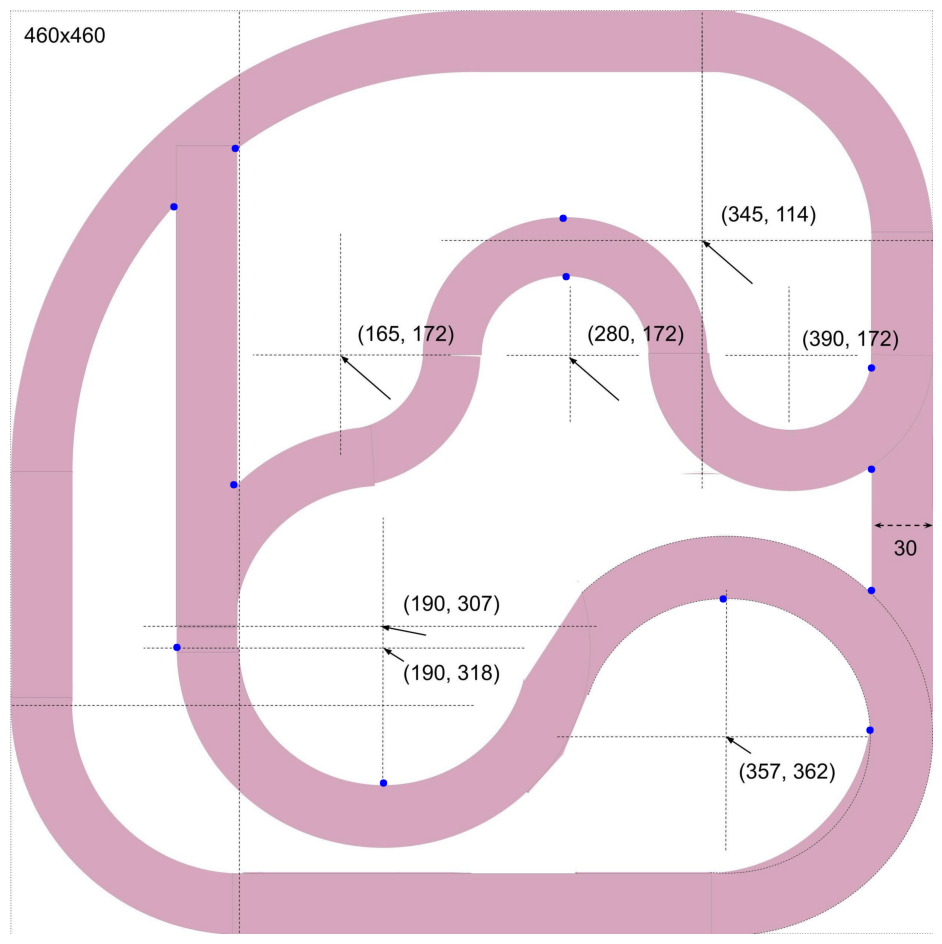

In [20]:
target_frame = Image.open(
    "/Users/aalbustami/UMD/BIMI/projects/broverette/DriveNetBench/assets/track.jpg"
)
target_frame = ref_vertex_annoatator.annotate(target_frame, target_keypoints)
sv.plot_image(target_frame)

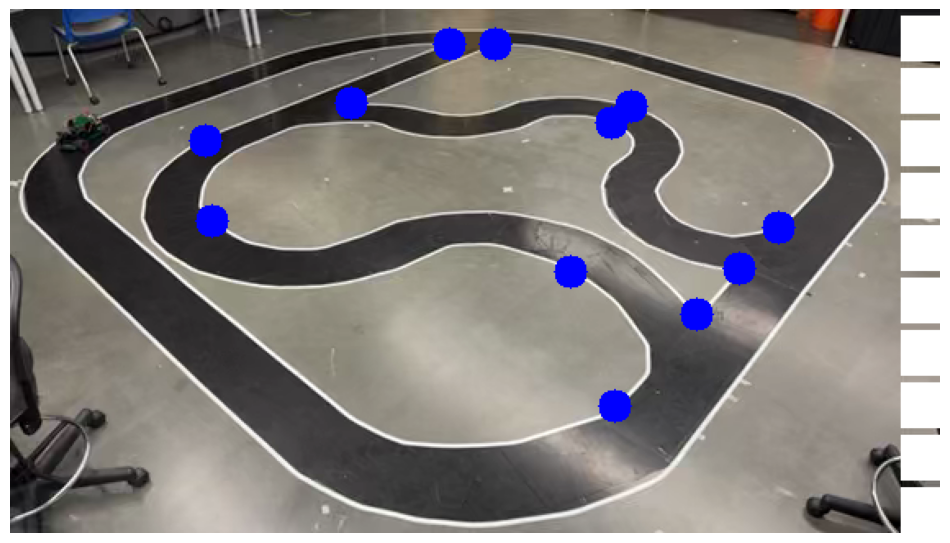

In [21]:
source_image = Image.open(
    "/Users/aalbustami/UMD/BIMI/projects/broverette/DriveNetBench/assets/pos3_frame_capture.png"
)
source_image = ref_vertex_annoatator.annotate(source_image, source_keypoints)
sv.plot_image(source_image)

In [22]:
view_transformer = ViewTransformer(
    source=source_keypoints, target=target_keypoints
)

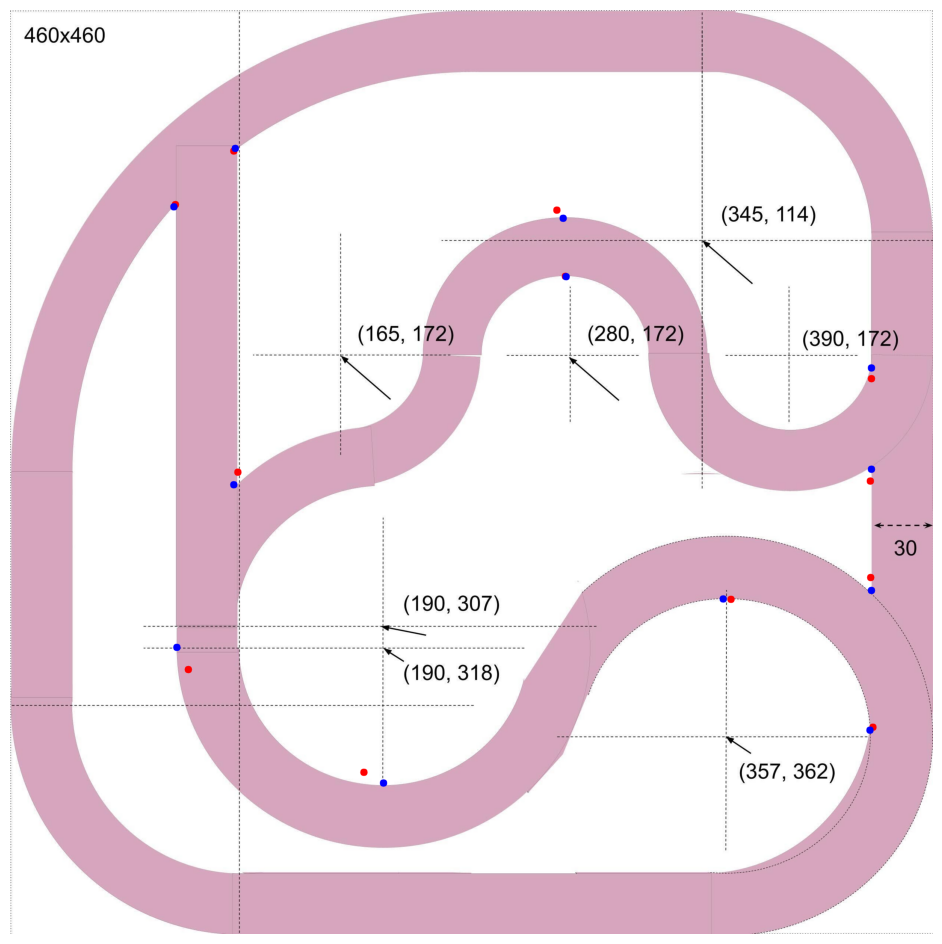

In [23]:
image = Image.open(
    "/Users/aalbustami/UMD/BIMI/projects/broverette/DriveNetBench/assets/track.jpg"
)
annotated_image = image.copy()
# annotated_image = ref_vertex_annoatator.annotate(annotated_image, source_keypoints)
transformed_keypoints = view_transformer.transform_points(
    original_source_keypoints
)
transformed_keypoints = transformed_keypoints[np.newaxis, ...]
transformed_keypoints = sv.KeyPoints(transformed_keypoints)
annotated_image = transformed_vertex_annotator.annotate(
    annotated_image, transformed_keypoints
)
annotated_image = ref_vertex_annoatator.annotate(
    annotated_image, target_keypoints
)
sv.plot_image(annotated_image)

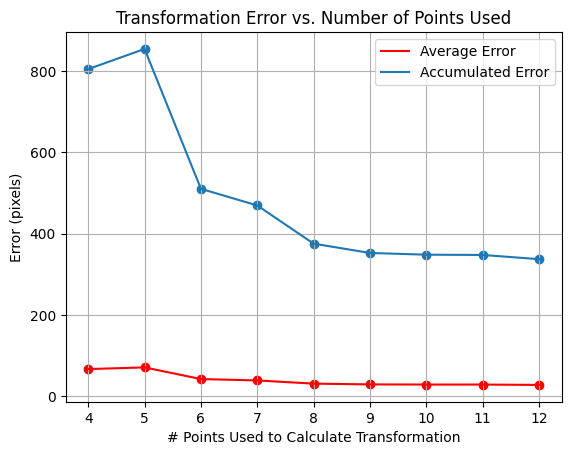

In [24]:
org_source_keypoints = np.load(
    "/Users/aalbustami/UMD/BIMI/projects/broverette/DriveNetBench/keypoints/pos3_keypoints_from_camera.npy"
)
org_target_keypoints = np.load(
    "/Users/aalbustami/UMD/BIMI/projects/broverette/DriveNetBench/keypoints/old_keypoints_from_digital.npy"
)

avg_errors = []
accumulated_errors = []

TOTAL_POINTS = 12
for i in range(4, TOTAL_POINTS + 1):
    source_keypoints = org_source_keypoints[:i, ...]
    target_keypoints = org_target_keypoints[:i, ...]

    source_keypoints = source_keypoints[np.newaxis, ...]
    target_keypoints = target_keypoints[np.newaxis, ...]

    source_keypoints = sv.KeyPoints(source_keypoints)
    target_keypoints = sv.KeyPoints(target_keypoints)

    view_transformer = ViewTransformer(
        source=source_keypoints, target=target_keypoints
    )

    transformed_keypoints = view_transformer.transform_points(
        original_source_keypoints
    )
    transformed_keypoints = transformed_keypoints[np.newaxis, ...]
    transformed_keypoints = sv.KeyPoints(transformed_keypoints)

    avg_error, accumulated_error = (
        view_transformer.calculate_transformation_error(
            source=org_source_keypoints,
            target=org_target_keypoints,
        )
    )
    avg_errors.append(avg_error)
    accumulated_errors.append(accumulated_error)


plt.plot(
    range(4, TOTAL_POINTS + 1), avg_errors, label="Average Error", color="r"
)
plt.scatter(range(4, TOTAL_POINTS + 1), avg_errors, color="r")
plt.plot(
    range(4, TOTAL_POINTS + 1), accumulated_errors, label="Accumulated Error"
)
plt.scatter(range(4, TOTAL_POINTS + 1), accumulated_errors)
plt.legend()
plt.xlabel("# Points Used to Calculate Transformation")
plt.ylabel("Error (pixels)")
plt.title("Transformation Error vs. Number of Points Used")
plt.grid()
plt.show()